# Семинар: Терминология. Введение в sklearn. KNN

## Общая схема решения задачи машинного обучения

**Вопросы**:

* Что такое задача машинного обучения? Что дано и что необходимо найти?
* Какие бывают типы признаков в машинном обучении?
* Какие бывают виды задач в машинном обучении?
* Что такое функционал качества? Для чего он нужен?

Машинное обучение — это наука, изучающая способы извлечения закономерностей из ограниченного количества примеров.
Объект - это то, с чем мы работаем, это то, для чего строим предсказание, прогноз и.т.д.

**Признаки** (результаты измерения некоторой характеристики объекта).  
Бинарные, вещественные, категориальные (принимают значения из неупорядоченного множества), ординальне (принимают значения из упорядоченного множества).

**Виды задач машинного обучения**.  
Задача обучения с учителем (**supervised
learning**): задача регрессии, задача классификации; задача обучения без учителя (**unsupervised
learning**): кластеризация, визуализация; обучение с подкреплением (**reinforcement learning**)

**Функционал
качества** $Q(a,X^l)$ измеряет качество работы алгоритма. Если функционал устроен так, что его следует минимизировать, то часто его называют  **функционалом ошибки**.

**Задача машинного обучения (обучение с учителем)**.  
Пусть заданы **множество объектов** $\mathbb {X}$, **множество допустимых ответов** $\mathbb {Y}$, и существует **целевая функция** (target function) $y^*: \mathbb {X}\rightarrow \mathbb {Y}$, переводящая объекты в ответы, значения которой $y_i=y^*(x_i):$ известны только на конечном подмножестве объектов $\{x_1,...,x_l\}\subset \mathbb {X}$. Совокупность пар "объект-ответ" $X^l = \{(x_i, y_i)\}_{i=1}^l$ называется **обучающей выборкой** (training sample).   
Будем рашать следующую задачу: по обучающей выборке $X^l$
восстановить целевую функцию $y^*$, то есть построить **решающую функцию** (decision
function) $a: \mathbb {X}\rightarrow \mathbb {Y}$, которая приближала бы целевую функцию $y^*(x)$, причём
не только на объектах обучающей выборки, но и на всём множестве объектов $\mathbb {X}$.
Решающая функция $a$ должна допускать эффективную компьютерную реализацию; по этой причине будем называть её **алгоритмом**. 

**Общая схема решения задачи машинного обучения**:

<div>
<img src="static/scheme.png" width="500"/>
</div>

1. **Постановка задачи**.

2. **Исходные данные Data (исходная выборка)**: **объекты**, выделение **признаков** (**features**) - характеристик объекта (числовые и т.д.). 

3. **Предобработка данных**: пропуски, признаки (числовые, категориальные), выбросы, масштабирование признаков, графическое представление данных.

4. **Формирование выборки**. **Обучающая выборка** $X, Y$ (**train**) формируеится из исходных данных (после предобработки). **Матрица объекты-признаки** $X$ имеет размер (число объектов, $l$) $\times$ (число признаков, $d$). Одна строка этой матрицы соответствует одному объекту обучающей выборки, заданному как вектор длины (число признаков). Вектор правильных ответов (целевая переменная, **target**) $Y$ имеет длину, равную числу объектов.   
$X=\begin{pmatrix}
  x_1^1&x_1^2&...& x_1^d\\
  x_2^1&x_2^2&...& x_2^d\\
  ... & .... & ...&... \\
  x_l^1&x_l^2&...& x_l^d\\
\end{pmatrix}, 
Y=\begin{pmatrix}
  y_1\\
  y_2\\
  ... \\
  y_l\\
\end{pmatrix}
$

Можно также: 
- разбить данные на обучающую (**train**) и тестовую (**test**) выборки, или 
- разбить данные на обучающую (**train**), валидационную (**validation**) и тестовую (**test**) выборки, или 
- разбить данные для осуществления кросс-валидации (**cross-validation**).

5. **Построение модели (обучение)**. **На этапе обучения** на основе обучающей выборки $X, Y$ строится (обучается, **fitting, learning, training**) **алгоритм** $a(x)$. Это некая функция, которая берет на вход признаки объекта и возвращает **предсказание** (**prediction**) для этого объекта: $y \approx a(x)$. Алгоритм $a$ может делать предсказания для любых допустимых объектов; его можно применять как к объектам из обучающей выборки, так и к тем, которых алгоритм "никогда не видел". 

6. **Оценивание качества модели**.

**Цель машинного обучения**: выявить такие закономерности в обучающей выборке, которые позволят делать качественные (довольно точные) предсказания на новых объектах $x$. 


### План семинара
- Предобработка данных при помощи scikit-learn
    - заполнение пропусков (обработка выбросов)
    - перевод категориальных признаков в числовые
    - масштабирование признаков
- Метрические методы. k Nearest Neighbours
    - Теоретическая часть
    - Практическая часть

### Интерфейс scikit-learn

`Scikit-Learn`, или коротко `Sklearn` - библиотека, в которой реализованы практически все используемые сегодня алгоритмы машинного обучения. Нам необходимо познакомиться с интерфейсом библиотеки, чтобы понимать, как ее можно использовать на практике. 

Для реализации алгоритмов машинного обучения в sklearn всегда используется один интерфейс - класс с функциями `fit(X, Y)` для обучения модели по обучающей выборке $X, Y$ и `predict(X)` для возвращения предсказаний на выборке $X$. При создании класса можно указывать дополнительные параметры, влияющие на работу алгоритма машинного обучения.



---

**Пример**. Логика работы класса линейной регрессии:
* При создании класса нужно запомнить коэффициент регуляризации;
* Задача функции fit - по выборке X и Y найти веса w и сохранить их внутри класса в self.w;
* Задача функции predict - по весам self.w и X вернуть предсказания $Y$.

$$w = (X^TX + \lambda E)^{-1}X^Ty$$

In [ ]:
#Пример структуры класса для линейной регрессии
class LinearRegressor:
    def __init__(self, reg_coef: float = None) -> None:
        self.lambda_ = reg_coef

    def fit(self, X_train: np.array, y_train: np.array) -> None:
        self.w = ... #находим оптимальные параметры модели

    def predict(self, X_test: np.array) -> np.array:
        y_pred = ... #делаем предсказание

        return y_pred

---

Если бы не использовали класс, нам пришлось бы передавать веса `w` в функцию `predict` каждый раз, когда мы захотели бы сделать предсказания, а так они хранятся внутри класса. Это особенно удобно, если таких вспомогательных переменных много.

Помимо алгоритмов обучения и предсказания для разных методов, в sklearn реализовано много вспомогательного функционала для предобработки данных, визуализации данных, вычисления метрик качества и т. д. 

Познакомимся с методами предобработки данных и их реализацией в sklearn. Для демонстраций загрузим набор данных [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile) (данные об автомобилях). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки (последняя колонка - стоимость автомобией).

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,     #в исх. таблице нет названий колонок
    na_values=["?"], #если ?, то NaN
)
X_raw.head()
#или локально из папки automobile 
#df = pd.read_csv("automobile/imports-85.data", sep=",", header=None, na_values=["?"])
#X_raw[25] - price

In [ ]:
#pd.read_csv?

In [ ]:
X_raw.shape

In [ ]:
X_raw.describe() #числовые признаки

In [ ]:
X_raw.describe(include = 'object') #категориальные признаки

In [ ]:
#X_raw.describe?

In [ ]:
#доля пропущенных значений в каждой колонке
X_raw.isna().mean()  # df.isnull() — то же самое, что df.isna()

Разделим признаки и целевую переменную:

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [ ]:
#матрица "объект-признак"
X_raw.head()

## Предобработка данных

###  Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Последний вариант сложный и применяется редко. Для заполнения константами можно использовать метод датафрейма fillna, для замены средними — класс `impute.SimpleImputer`.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# для удобства работы с нашим датасетом создаем маску, 
#указывающую на столбцы с категориальными признаками
# категориальные признаки имеют тип "object"

#посмотрим типы данных столбцов
X_raw.dtypes == "object"
#X_raw.info()

In [ ]:
#берем только значения
cat_features_mask = (X_raw.dtypes == "object").values
cat_features_mask

__Для вещественнозначных признаков__ заполним пропуски средними (последовательно)

In [ ]:
~cat_features_mask

In [ ]:
X_raw.columns[~cat_features_mask]

In [ ]:
X_real = X_raw[X_raw.columns[~cat_features_mask]]
X_real

In [ ]:
mis_replacer = SimpleImputer(strategy="mean") #среднее в столбцах (сразу для всех числовых столбцов)
data = mis_replacer.fit_transform(X_real)   #заменяем пропуски средним
data

#X_real[1].mean()
#type(data)

In [ ]:
X_no_mis_real = pd.DataFrame(
    data, columns=X_real.columns
)
X_no_mis_real.head() #вещественнозначные признаки

__Для категориальных признаков__ заполним пропуски пустыми строками (последовательно)

In [ ]:
X_raw.columns[cat_features_mask]

In [ ]:
#X_raw[X_raw.columns[cat_features_mask]].head(30)
#X_raw.loc[27]
X_raw[X_raw.columns[cat_features_mask]].loc[26:28]

In [ ]:
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("") #или fillna("unknown")
X_cat.loc[26:28] #категориальные признаки

In [ ]:
X_no_mis = pd.concat([X_no_mis_real, X_cat],axis=1)
X_no_mis#.head(30) 

Всегда нужно анализировать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

Пример: предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению. В наши данных пропусков в категориальных признаках нет.

### Перевод категориальных признаков в числовые
Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества $K$. К таким признакам обычно применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) (вместо одного признака создают $K$ бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать с помощью классов LabelEncoder, OneHotEncoding, но проще использовать функцию `pd.get_dummies`.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр `OneHotEncoder(sparse = True)` или `.get_dummies(sparse=True)`, и метод вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

**Способ 1 `.get_dummies()`**

In [ ]:
#после заполнения пропусков смотрим на число уникальных значений для категор. пр.
X_no_mis.describe(include = 'object')

In [ ]:
#для примера: уникальные значения в колонке 17
X_no_mis[17].unique()

In [ ]:
X_no_mis[17].iloc[20:30]

In [ ]:
#применяем pd.get_dummies к одной колонке
pd.get_dummies(X_no_mis[17], drop_first=True, dtype=float).iloc[20:30]

In [ ]:
#применяем pd.get_dummies ко всему датафрейму
print(f"Shape before encoding: {X_no_mis.shape}")
X_dum = pd.get_dummies(X_no_mis, drop_first=True, dtype=float) 
#drop_first=True - одну колонку в закодированых выкинули 
#(избежать лин.зав. в призн) - необходимость зависит от задачи
#dtype=float - выводятся именно 0 и 1, иначе - False и True
X_dum.head()

In [ ]:
print(f"Shape after encoding: {X_dum.shape}")

In [ ]:
X_dum.columns

**Конец способа 1 `.get_dummies()`**

**Способ 2. `OneHotEncoder()`**

In [ ]:
# from sklearn.preprocessing import OneHotEncoder #передаются только категориальные столбцы
# from sklearn.compose import make_column_selector as selector

# #выбираем категориальные признаки
# categorical_columns_selector = selector(dtype_include=object)
# categorical_columns = categorical_columns_selector(X_no_mis)
# X_no_mis_categorical = X_no_mis[categorical_columns]
# X_no_mis_categorical.head()

In [ ]:
# encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
# X_no_mis_categorical_encoded = encoder.fit_transform(X_no_mis_categorical)
# X_no_mis_categorical_encoded

In [ ]:
# #список значений категорий 
# encoder.categories_

In [ ]:
#или

#encoder = OneHotEncoder(drop='first') 
#encoder.fit(X_no_mis[[2,3,4,5,6,7,8,14,15,17]])
#X_no_mis_encoder = encoder.transform(X_no_mis[[2,3,4,5,6,7,8,14,15,17]]).toarray()
#X_no_mis_encoder = pd.DataFrame(X_no_mis_encoder)

In [ ]:
#encoder.categories_

In [ ]:
#X_no_mis.join(X_no_mis_encoder)
#X_no_mis_encoder

In [ ]:
#переименуем числ. колонки (чтобы потом соединить таблицы, 
#т.к. названия разных столбцов в X_no_mis_encoder и в X_no_mis_encoder 
#теперь одинаковые)
#X_no_mis_real.columns = X_no_mis_real.columns+100
#X_no_mis_real.join(X_no_mis_encoder)

**Конец способа 2. `OneHotEncoder()`**

Помимо категориальных, преобразования требуют, например, **строковые признаки**. Их можно превращать в матрицу частот слов [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), матрицу частот буквосочетаний фиксированной длины, можно извлекать другие признаки (например, длина строки).

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу. Это важно для численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем в области больших чисел). Кроме того, у каждого метода машинного обучения есть свои особенности, требующие масштабирования признаков. Например, для линейных моделей - это ускорение обучения и повышение интерпретируемости модели.

Первый популярный способ масштабирования - **нормализация (стандартизация)**: вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в sklearn). 
$$x_{ij}
    :=
    \frac{x_{ij} - \mu_j}{\sigma_j},
$$
где $\mu_j = \frac{1}{\ell} \sum_{i = 1}^{\ell} x_{ij}$,
$\sigma_j = \sqrt { \frac{1}{\ell} \sum_{i = 1}^{\ell} (x_{ij} - \mu_j)^2}$.


Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в sklearn). То есть **масштабируем признаки на отрезок $[0, 1]$**:
$$
    x_{ij}
    :=
    \frac{x_{ij} - \min_i x_{ij}}{\max_i x_{ij} - \min_i x_{ij}}.
$$


**Способ 1. MinMaxScaler()**

In [ ]:
X_dum.values

In [ ]:
type(X_dum.values)

In [ ]:
X_dum.values.shape

In [ ]:
from sklearn import preprocessing

In [ ]:
#ошибка, если подавать X_dum, нет ошибки, если подавать X_dum.values (тип numpy.ndarray) !!!!
normalizer = preprocessing.MinMaxScaler()
#одновременно fit и transform, результат np.array
X_real_norm_np = normalizer.fit_transform(X_dum.values) 
X = pd.DataFrame(data=X_real_norm_np, columns = X_dum.columns) #снова датафрейм
X.head()

**Конец способа 1. MinMaxScaler()**

---

#### Пример реализации StandardScaler

Реализуем класс для нормализации данных по аналогии с интерфейсом sklearn для нормализации (StandardScaler в sklearn).

Предобработка данных в sklearn реализована по похожему шаблону, что и обучение моделей: функция `.fit(X)` запоминает внутренние переменные, а функция `.transform(X)` выполняет преобразование выборки. y здесь не нужен, потому что в нормализации целевые переменные не участвуют (как и почти во всей предобработке данных).

Параметров у класса нет, так что функцию `__init__` мы пропускаем. Функция `.fit()` считает статистики - среднее и стандартное отклонение каждого признака (по обучающей выборке), а функция `.tranform()` вычитает среднее и делит на стандартное отклонение. Для вычисления статистик используем numpy.

In [ ]:
class Normalizer:
    def fit(self, X: np.array) -> None:
        self.mu = X.mean(axis=0)
        self.sigma = X.std(axis=0)

    def transform(self, X: np.array) -> np.array:
        return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]

Создаем случайные данные X и y для тестирования нашего класса:

In [ ]:
num_obj_train = 20
num_obj_te = 10
num_feat = 4
X_train = np.random.randint(-5, 5, size=(num_obj_train, num_feat))
X_train.shape

In [ ]:
X_test = np.random.randint(-5, 5, size=(num_obj_te, num_feat))
X_test.shape

Создаем объект класса и трансформируем выборку:

In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train)
X_train_transformed = normalizer.transform(X_train)
X_test_transformed = normalizer.transform(X_test)

Fit нужно вызывать именно на обучающих данных, чтобы ничего не подсмотреть в контрольной выборке. А transform можно вызывать много раз для любых выборок (с уже посчитанным статистиками, которые хранятся внутри класса).

In [ ]:
X_train[:3]

In [ ]:
X_train_transformed[:3]

---

**Способ 2. StandardScaler()** в sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#масштабируем

#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train[:3]

**Конец способа 2. StandardScaler()**

## Метрические методы. k Nearest Neighbours (kNN)

### Теоретическая часть

__Вопросы:__
* Как в методе k ближайших соседей выполняются предсказания в задаче классификации и регрессии?
* Что такое гипотеза компактности?
* Какие функции расстояния можно использовать для вещественных признаков, категориальных признаков, строковых признаков, множественнозначных признаков?

<u>Гипотеза компактности<u> — в задачах классификации предположение о том, что схожие объекты гораздо чаще лежат в одном классе, чем в разных; или, другими словами, что классы образуют компактно локализованные подмножества в пространстве объектов. Это также означает, что граница между классами имеет достаточно простую форму.

**Пример**. Классификация методом kNN для k=3, k=7

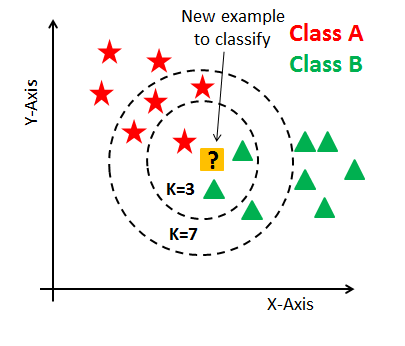

**Метрики в kNN**.

<u>Метрика</u> является функцией, задающей расстояние в метрическом пространстве $\rho (x,y)$ между двумя элементами $x$ и $y$ этого метрического пространства, и должна удовлетворять следующим аксиомам:
1. $\rho (x,y)≥0$, причем $\rho (x,y)=0 \Leftrightarrow x=y$,
2. $\rho (x,y)=\rho (y,x)$,
3. $\rho (x,y)≤\rho (x,z)+\rho (z,y)$.

**Примеры метрик**:

- Евклидова метрика:
$\rho (x,y)=\sqrt {\sum_{i=1}^n (x_i-y_i)^2 }$

- Манхэттенская метрика:
$\rho (x,y)=\sum_{i=1}^n |x_i-y_i|$

- Метрика Минковского (обобщение Евклидовой и Манхэттенской метрик):
$\rho (x,y)=(\sum_{i=1}^n |x_i-y_i|^q)^{\frac{1}{q}}$

Изображения единичной окружности, то есть множества точек, удаленных на расстояние 1 от начала координат, в различных метриках:

<div>
<img src="static/Mink_metr.png" width="450"/>
</div>

#### Задача 1.
Предположим, мы решаем <u>__задачу классификации__</u> на три класса по двум признакам и используем метод k ближайших соседей с k=3 и манхэттенской метрикой. Мы имеем следующую обучающую выборку:

|     | Признак 1 | Признак 2 | Класс |
|-----|-----------|-----------|-------|
|объект_1| 1         | -1        | 1     |
|объект_2| 2         | 2         | 1     |
|объект_3| 3         | 2         | 2     |
|объект_4| 1         | 0         | 3     |
|объект_5| 2         | -2        | 3     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__

Алгоритм предсказания kNN для <u>задачи классификации</u>:
1. Вычислить расстояние от каждого объекта обучающей выборки до тестового объекта.
1. Найти k объектов обучающей выборки (соседей) с наименьшим расстоянием до тестового объекта.
1. Вернуть наиболее встречающийся класс среди k соседей.

Формула для определения класса нового объекта $$a(x)=\arg \max_{y\in Y}\sum_{i=1}^k[y_{(i)}=y]$$ 


Вычислим расстояния. Расстояние от первого объекта в обучении до тестового объекта $x$ (манхэттэнская метрика):

$$|1-2| + |-1-(-1)| = 1.$$

Аналогично для 2-5 объектов: получатся расстояния 3, 4, 2, 1.

Находим 3 ближайших объекта: это объекты с номерами 1, 4, 5 (расстояния 1, 2, 1 соответственно). Эти три объекта относятся к классам 1, 3, 3. Чаще всего встречается класс 3, поэтому предсказываем 3.


#### Общая формула для определения класса нового объекта $$a(x)=\arg \max_{y\in Y}\sum_{i=1}^kw_i[y_{(i)}=y]$$ 

где $w_i=1$ или $w_i=\frac{k+1-i}{k}$, или $w_i=q^i$ (где $0<q<1$), или $w_i=\frac{1}{i}$, или $w_i=\frac{1}{\rho(x,x_{(i)})}$, или $w_i=K(\frac{\rho(x,x_{(i)})}{h})$ (где $K$ - ядро (ф-ия близости двух объектов), $h$ - ширина окна) и пр.

#### Задача 2.
Визуализируйте __разделяющую поверхность__ между классами для следующей выборки:

|     | Признак 1 | Признак 2 | Класс |
|-----|-----------|-----------|-------|
|объект_1| 2         | 2        | 1     |
|объект_2| 3         | 2         | 1     |
|объект_3| 2         | 0         | 2     |
|объект_4| 1         | -1         | 3     |
|объект_5| 1         | 1        | 3     |

Используйте k=1 и евклидово расстояние.

__Решение.__

В задачах классификации с двумя признаками мы можем изобразить признаковое пространство на плоскости и раскрасить его в разные цвета в соответствии с классом каждой точки плоскости. В этом и состоит сейчас наша задача.

Для начала отобразим на плоскости обучающую выборку - пять точек - в соответствии с их координатами.

При $k=1$ каждая точка плоскости будет относиться к тому же классу, что и ближайший к ней объект обучающей выборки. Если нам даны две точки разных классов, то, чтобы провести между ними границу классов, нужно построить серединный перпендикуляр. Для случая с несколькими точками нужно построить несколько серединных перпендикуляров, найти их точки пересечения и определить, какие области к каким классам относятся. Более строго такая конструкция задается с помощью [Диаграммы Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE), но мы не будем вдаваться в ее детали.

<div>
<img src="static/classifi.png" width="350"/>
</div>

#### Задача 3.
Предположим, мы решаем <u>__задачу регрессии__</u> по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

|     | Признак 1 | Признак 2 | Ответ |
|-----|-----------|-----------|-------|
|объект_1| 1         | -1        | 3.5     |
|объект_2| 2         | 2         | 2.3     |
|объект_3| 3         | 2         | 1.7     |
|объект_4| 1         | 0         | -0.4     |
|объект_5| 2         | -2        | 0.1     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__

Формула для определения прогноза для нового объекта $$a(x)=\frac{1}{k}\sum_{i=1}^ky_{(i)}$$

Предсказания kNN для <u>регрессии</u> отличаются от предсказаний для классификации только финальным шагом: вместо поиска наиболее часто встречающегося класса нужно усреднить ответы на соседях. Признаки в этой задаче те же, что в задаче 1, поэтому соседей мы уже знаем: это объекты с номерами 1, 4, 5. На них мы имеем ответы 3.5, -0.4, 0.1. Усредним их: (3.5-0.4+0.1)/3 = 1.1. Предсказываем 1.1.


#### Взвешенный kNN для регрессии (общая формула для определения прогноза для нового объекта) $$a(x)=\frac{\sum_{i=1}^kw_iy_{(i)}}{\sum_{i=1}^kw_i}$$

(веса можно задавать по какому-либо правилу или $w_i=K(\frac{\rho(x,x_{(i)})}{h})$ (где $K$ - ядро (ф-ия близости двух объектов), $h$ - ширина окна))

#### Вопрос: каковы параметры и гиперпараметры метода kNN?
__Ответ:__

<u>Параметры</u> - это величины, которые мы настраиваем в процессе обучения по обучающей выборке. В методе kNN нет как такового обучения - это очень простой эвристический алгоритм. Под параметрами в kNN можно понимать обучающую выборку. В другой трактовке у метода нет параметров.

<u>Гиперпараметры</u> - это величины, которые мы должны установить до начала обучения модели. Гиперпараметры не настраиваются по обучающей выборке в процессе обучения модели. Два самых важных гиперпараметры метода kNN — это <u>число соседей k</u> и <u>метрика</u>. Используя разные комбинации этих гиперпараметров, можно получать совершенно разное качество работы алгоритма. Гиперпараметры обычно настраивают по валидационной выборке или используя кросс-валидацию.

#### Какова динамика качества работы kNN при увеличении k?

__Ответ:__

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. Если, к примеру, в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении.

При $k$, равном числу объектов в выборке, для всех объектов будет предсказываться одно и то же, что вновь говорит о низком качестве работы классификатора. Получается, что качество kNN при увеличении $k$ должно сначала расти, а потом падать, и оптимум будем где-то посередине.

Рассмотрим синтетический пример: на рисунке визуализирована обучающая выборка ("настоящая" разделяющая поверхность - прямая) и разделяющая поверхность kNN по аналогии с задачей 2, и на разных графиках используется разное число соседей $k$:

<div>
<img src="static/k_grid.png" width="550"/>
</div>

При использовании малых $k$ разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и ровнее и при $k=50$ выглядит наиболее разумно. При большем k разделяющая поверхность уходит от линейной, и оранжевый класс "захватывает" синий.

#### Почему при использовании kNN важно нормировать данные?

__Ответ:__

Рассмотрим для примера манхэттэнскую метрику. Если один признак будет иметь масштаб около 1000, а другой - около 1, то когда мы будем складывать модули разностей для этих двух признаков, второй признак практически не будет иметь влияния на ответ. Если же признаки отнормировать, но они все будут в одной шкале.

### Практическая часть

Данные - цифры (0,1,2,3.4,5,6,7,8,9). Объект - черно-белая картинка с одной цифрой (каждая цифра в разрешении 8 на 8 пикселей, то есть для каждой цифры получим 64 признака). Задача классификации на 10 классов. Классы сбалансированы, то есть в каждом классе цифр одинаковое количество. 

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import load_digits #стандартный датасет с цифрами
from sklearn.utils import shuffle #перемешивание цифр

In [ ]:
#load_digits?

In [ ]:
data = load_digits()


In [ ]:

X = data.images #признаки
y = data.target #целевая переменная

X.shape

In [ ]:
#Посмотрим на X. С таким X неудобно работать.
#Значение каждого элемента - яркость (цвет) соответствующего пикселя 
X[:2]

In [ ]:
X[0]

In [ ]:
#визуализация
import matplotlib.pyplot as plt
plt.gray() #Set the colormap to 'gray'
plt.matshow(X[0]) #отобразить массив
plt.show()

In [ ]:
X[0][0]

In [ ]:
X[0][0][2]

In [ ]:
X.shape[0] #количество объектов в данных (цифр)

In [ ]:
#Чтобы было удобно работать с данными,
#вытягиваем квадратное изображение (8 на 8) в вектор 
#(чтобы получить матрицу объекты-признаки)
X = X.reshape(X.shape[0], -1)

# перемешиваем данные (одновременно соответ. строки  в X и y)
X, y = shuffle(X, y)
print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

In [ ]:
#shuffle?

---

#### Пример

In [ ]:
T = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
Ty = np.array([[10], 
               [11], 
               [12]])
T, Ty

In [ ]:
shuffle(T,Ty)

---

In [ ]:
X.shape

In [ ]:
X_train, y_train = X[:700, :], y[:700]      #train
X_val, y_val = X[700:1300, :], y[700:1300]  #validation (для подбора гиперпараметров)
X_test, y_test = X[1300:, :], y[1300:]      #test

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
X_train

In [ ]:
# import sklearn
# print(sklearn.__version__)

In [ ]:
#!pip install scikit-learn   
#==1.2.1

In [ ]:
#!pip show scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #классификатор

In [ ]:
# Обучаем классификатор и делаем предсказания
clf = KNeighborsClassifier(n_neighbors=3, p=1, n_jobs=-1) #n_jobs=10

clf


In [ ]:
clf.fit(X_train, y_train)

In [ ]:
#clf.predict(X_test)
y_predicted = clf.predict(X_test)

In [ ]:
#KNeighborsClassifier?

Вычисляем метрику качества алгоритма — <u>долю правильных ответов</u>

In [ ]:
#Способ 1
print("Accuracy is: ", np.mean(y_test == y_predicted))

In [ ]:
#Способ 2
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

Учитывая, что у нас 10 классов, то вероятность угадать правильный ответ много раз очень мала. Поэтому полученное значение accuracy — очень хороший результат!

Попробуем использовать разные значения гиперпараметра k. Сравнивать разные значения k по обучающей выборке бесполезно: каждый объект является ближайшим сам к себе и оптимальное k будет равно 1. Будем сравнивать разные k по качеству на валидационной выборке:

In [ ]:
# Подбор k на валидационной выборке:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_val)

#    y_predicted = (
#        KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)
#    )

    val_accuracy = np.mean(y_predicted == y_val)
    print(f"k = {k}; accuracy = {val_accuracy:.3f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k_best

Сравним accuracy на обучении, валидации и тесте для найденного лучшего значения k:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

Качество на обучающей выборке самое лучшее, но оно обманчиво, ведь алгоритм уже знает эти объекты.
На валидационной выборке мы тоже использовали ответы - уже для подбора гиперпараметра k, так что этот показатель тоже не совсем честный. 
И действительно, качество на тестовой выборке (ответы для которой мы нигде не подсматривали) может оказаться хуже, чем на валидационной выборке.

_Вывод_: оценивать качество алгоритма нужно на отложенной выборке, которая не используется нигде в обучении и не используется в подборе гиперпараметров.